### Importing Libraries

In [1]:
#Importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### **Importing Data Sets**

In [2]:
# importing dataset

dataset = pd.read_csv("/content/delivery_time.csv")

In [3]:
dataset.shape

(21, 2)

In [4]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
dataset=dataset.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })

In [6]:
dataset.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      21 non-null     float64
 1   st      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


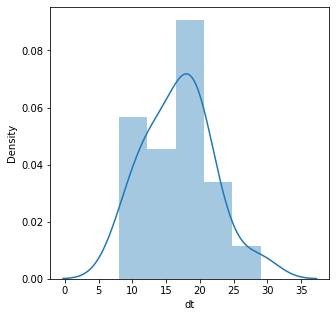

In [17]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dataset['dt'])
plt.show() 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


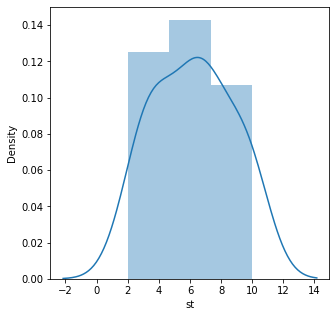

In [18]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(dataset['st'])
plt.show() 

# Log Transformation of Dataset

In [19]:
data_log=np.log(dataset)

In [23]:
data_log.head()

,dt,st
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


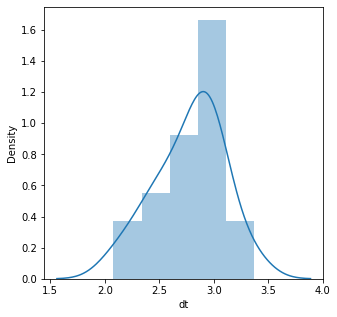

In [20]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(data_log['dt'])
plt.show() 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


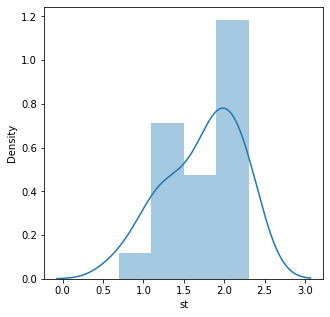

In [21]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(data_log['st'])
plt.show() 

**Selection of Independent and Dependent Variables**

In [22]:
#let X = Independent variable which is Sorting Time
X = data_log.iloc[:, 1].values

# Let y = Dependent variable which is Delivery Time
y = data_log.iloc[:,0].values

In [24]:
X

array([2.30258509, 1.38629436, 1.79175947, 2.19722458, 2.30258509,
       1.79175947, 1.94591015, 1.09861229, 2.30258509, 2.19722458,
       2.07944154, 1.38629436, 1.94591015, 1.09861229, 1.09861229,
       1.38629436, 1.79175947, 1.94591015, 0.69314718, 1.94591015,
       1.60943791])

In [25]:
y

array([3.04452244, 2.60268969, 2.98315349, 3.17805383, 3.36729583,
       2.73111547, 2.94443898, 2.2512918 , 2.88480071, 2.93119375,
       2.98719594, 2.37490575, 2.8142104 , 2.44234704, 2.48740353,
       2.70001803, 2.62103882, 2.89646427, 2.07944154, 2.88088243,
       3.06805294])

#Missing Data

In [26]:
dataset.isnull().sum()

dt    0
st    0
dtype: int64

There is no missing data to handle in the dataset

# OUTLIERS IDENTIFICATION

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


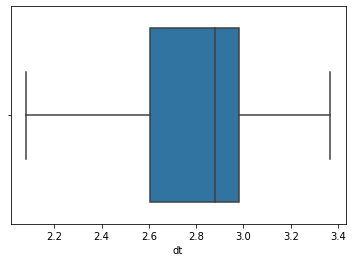

In [28]:
sns.boxplot(data_log['dt'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


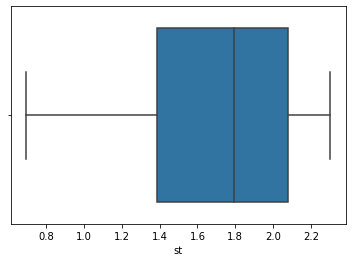

In [29]:
sns.boxplot(data_log['st'])

As we observed from boxplot of both variables ,there is no outlier detected.so, no need to take any action

# splitting the dataset
dataset is very small so,spillting is useless here


# machine learning algorithm

In [30]:
#simple linear regression
data_log.corr()

,dt,st
dt,1.000000,0.878727
st,0.878727,1.000000


In [31]:
import statsmodels.formula.api as smf
model =smf.ols("dt~st",data=data_log).fit()

# visualisation


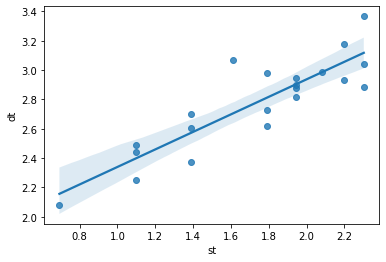

In [32]:
import seaborn as sns 
sns.regplot(x="st",y="dt",data=data_log)

In [33]:
model.params

Intercept    1.741987
st           0.597522
dtype: float64

In [34]:
#p-Values
print(model.pvalues)  

Intercept    5.921137e-11
st           1.601539e-07
dtype: float64


In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                        13:10:45   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
st             0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# to check out model working properly or not existing dataset values alongwith predicted values are also printed.
newdata=pd.Series([6,7,8,9,10,11,12,13,14])

In [37]:
data_pred=pd.DataFrame(newdata,columns=["st"])

In [38]:
data_pred

,st
0,6
1,7
2,8
3,9
4,10
5,11
6,12
7,13
8,14


In [39]:
model.predict(data_pred)

0     5.327121
1     5.924643
2     6.522166
3     7.119688
4     7.717210
5     8.314733
6     8.912255
7     9.509777
8    10.107300
dtype: float64

For **Sorting time** 6,7,8,9,10,11,12,13, and 14 we get the predicted values of **delivery time** as 5.327121,5.924643,6.522166,7.119688,7.717210,8.314733,8.912255,9.509777,10.107300 respectively.